<a href="https://colab.research.google.com/github/tanmay9011/my-First-Repo/blob/main/50_crosssession_PCA_Copy_with_predicted_output_image.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import IPython.display as display
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import os
import keras
from sklearn.model_selection import train_test_split

In [ ]:
from tqdm import tqdm
import os
import IPython.display as display
from PIL import Image
import pathlib
import cv2
from keras.utils import to_categorical

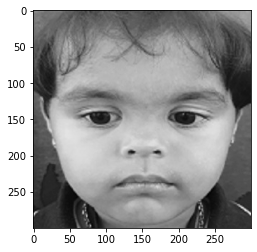

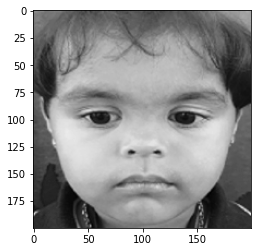

100%|█████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 501.35it/s]

504


In [ ]:
DATADIR = 'crosssessions'

CATEGORIES = ['1) Manavi Prashant chaudhari', '10)ronak sharad koli',
       '11) kabir vikrant godekar', '12)utkarsh rajesh patil',
       '13)purva ravindra surwade', '14) mayank rahul patil',
       '15) lokesh vijay patil', '16) kartiki nilesh patil',
       '17) bhavesh amol tayade', '18)rudraksh mayur patil',
       '19) Dishant umesh Chajjed', '2) Prathamesh gavrav joshi',
       '20) krushan pankaj joshi', '21) Giya praveen pawar',
       '22) Harshita Sachin pawar', '2nd time', '3) Jhanvi manoj pandit',
       '4) Chetan Nyaneshwar koli', '5) Aaradhya ramlal sonawane',
       '6) Aaradhya rahul patil', '7) jitesh raJesh jagtap',
       '8)urvashi jitendra sonawane', '9) bhargav sudhakar patil',
       'Aaryansh', 'Apoorva', 'Atharva', 'Avani', 'Deshana', 'Devamsh',
       'Dhanavi', 'Dhruv', 'Divija', 'Faiz', 'Jaisal', 'kirti', 'Kiya',
       'Lavanya', 'Mayara', 'Medhansh', 'Mohini', 'Prajakta', 'Prisha',
       'Pushpa', 'Ridhiksha', 'Sanghita', 'siya', 'Tanish', 'Ved', 'Vir',
       'Viraj']

for category in CATEGORIES:  # do dogs and cats
    path = os.path.join(DATADIR,category)  # create path to dogs and cats
    for img in os.listdir(path):  # iterate over each image per dogs and cats
        img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
        plt.imshow(img_array, cmap='gray')  # graph it
        plt.show()  # display!

        break  # we just want one for now so break
    break  #...and one more!

IMG_SIZE = 200
new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array, cmap='gray')
plt.show()

training_data = []

def create_training_data():
    for category in CATEGORIES:  # do dogs and cats

        path = os.path.join(DATADIR,category)  # create path to dogs and cats
        class_num = CATEGORIES.index(category)  # get the classification  (0 or a 1). 0=dog 1=cat

        for img in tqdm(os.listdir(path)):  # iterate over each image per dogs and cats
            try:
                img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  # resize to normalize data size
                training_data.append([new_array, class_num])  # add this to our training_data
            except Exception as e:  # in the interest in keeping the output clean...
                pass
            #except OSError as e:
            #    print("OSErrroBad img most likely", e, os.path.join(path,img))
            #except Exception as e:
            #    print("general exception", e, os.path.join(path,img))

create_training_data()

print(len(training_data))


In [ ]:
import random
random.shuffle(training_data)

#for sample in training_data[:26]:
 #   print(sample[1])


# In[7]:


X = []
y = []
for features,label in training_data:
    X.append(features)
    y.append(label)
    #print(X[0].reshape(-1, IMG_SIZE, IMG_SIZE, 1))


X_train= np.array(X)#.reshape(-1, IMG_SIZE, IMG_SIZE, 1)
y_train = np.array(y)

print(X_train.shape)
print(y_train.shape)



(504, 200, 200)
(504,)


<AxesSubplot:title={'center':'Number of Samples for Each Classes'}, xlabel='subject ids'>

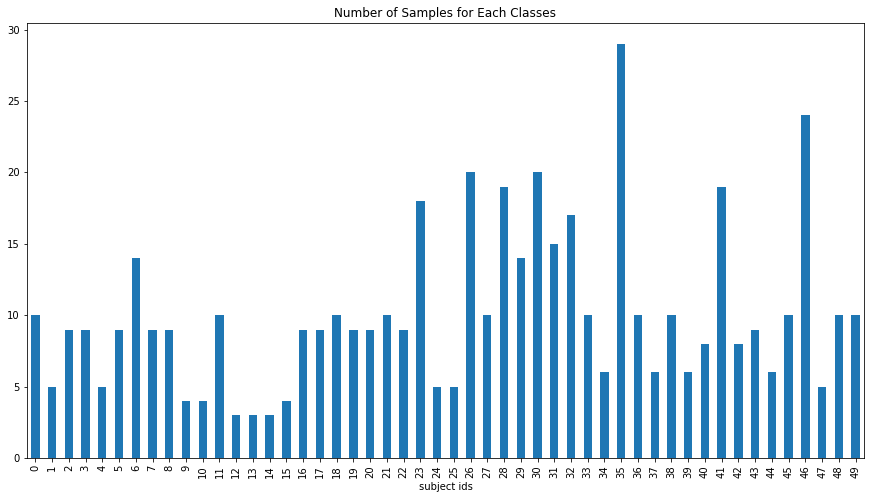

In [ ]:
import pandas as pd
y_frame=pd.DataFrame()
y_frame['subject ids']=y_train
y_frame.groupby(['subject ids']).size().plot.bar(figsize=(15,8),title="Number of Samples for Each Classes")

In [ ]:
X_train, X_test, y_train, y_test=train_test_split(X_train, y_train, test_size=0.2, random_state=0)
print("X_train shape:",X_train.shape)
print("y_train shape:{}".format(y_train.shape))

X_train shape: (403, 200, 200)
y_train shape:(403,)


In [ ]:
X = X_train.reshape((X_train.shape[0],X_train.shape[1]*X_train.shape[2]))
print("X shape:",X.shape)

X shape: (403, 40000)


In [ ]:
X_test=X_test.reshape((X_test.shape[0],X_test.shape[1]*X_test.shape[2]))
print("X_test shape:",X_test.shape)

X_test shape: (101, 40000)


In [ ]:
print(X.shape)
print(X.dtype)
print(X_test.shape)
print(X_test.dtype)
print(y_train.shape)
print(y_train.dtype)


(403, 40000)
uint8
(101, 40000)
uint8
(403,)
int32


In [ ]:
from sklearn.decomposition import PCA
pca=PCA(n_components=2)
pca.fit(X)
X_pca=pca.transform(X)

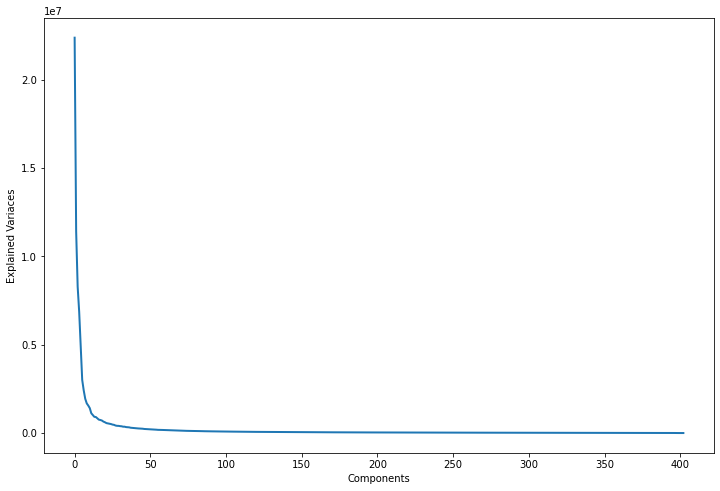

In [ ]:
pca=PCA()
pca.fit(X)

plt.figure(1, figsize=(12,8))

plt.plot(pca.explained_variance_, linewidth=2)
 
plt.xlabel('Components')
plt.ylabel('Explained Variaces')
plt.show()

In [ ]:
n_components=50

In [ ]:
pca=PCA(n_components=n_components, whiten=True)
pca.fit(X)

PCA(n_components=50, whiten=True)

Text(0.5, 1.0, 'Average Face')

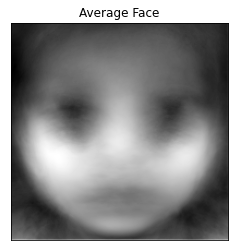

In [ ]:
fig,ax=plt.subplots(1,1,figsize=(4,4))
ax.imshow(pca.mean_.reshape((200,200)), cmap="gray")
ax.set_xticks([])
ax.set_yticks([])
ax.set_title('Average Face')


Text(0.5, 0.98, 'All Eigen Faces')

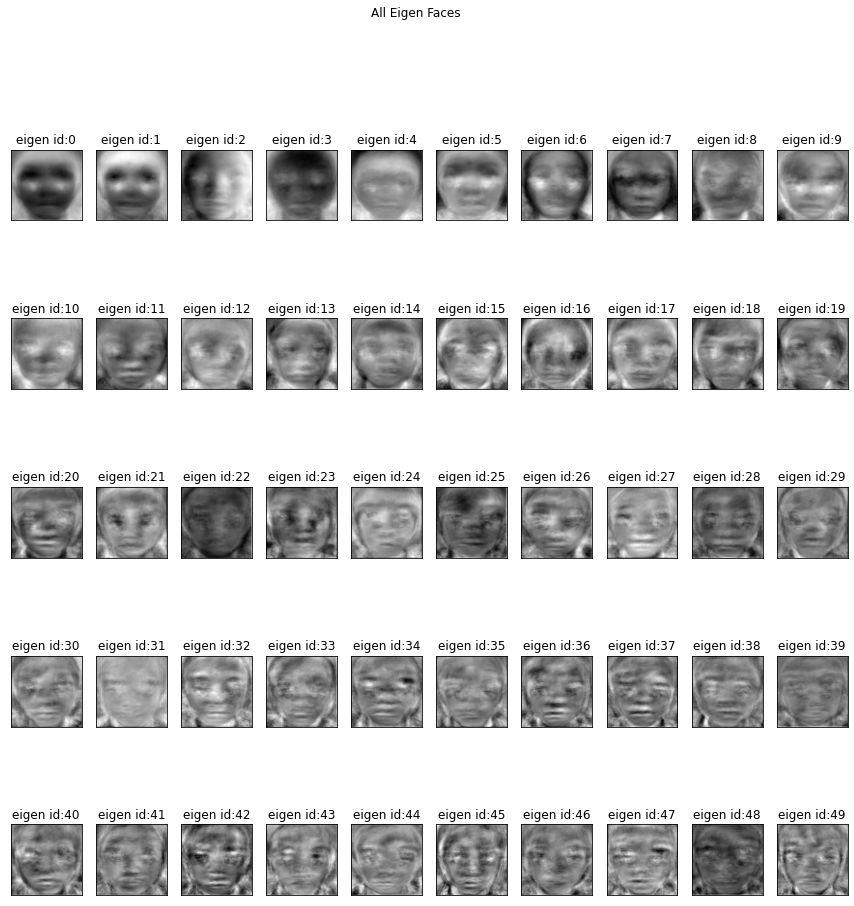

In [ ]:
number_of_eigenfaces=len(pca.components_)
eigen_faces=pca.components_.reshape((number_of_eigenfaces, 200,200))

cols=10
rows=int(number_of_eigenfaces/cols)
fig, axarr=plt.subplots(nrows=rows, ncols=cols, figsize=(15,15))
axarr=axarr.flatten()
for i in range(number_of_eigenfaces):
    axarr[i].imshow(eigen_faces[i],cmap="gray")
    axarr[i].set_xticks([])
    axarr[i].set_yticks([])
    axarr[i].set_title("eigen id:{}".format(i))
plt.suptitle("All Eigen Faces".format(10*"=", 10*"="))


In [ ]:
print(X_test.shape)

(101, 40000)


In [ ]:
X_train_pca=pca.transform(X)
X_test_pca=pca.transform(X_test)

In [ ]:
print(X_test_pca.shape)
print(y_train.shape)
print(X_train_pca.shape)

(101, 50)
(403,)
(403, 50)


In [ ]:
import sklearn.metrics as metrics
from sklearn.svm import SVC
clf = SVC()
clf.fit(X_train_pca, y_train)
y_pred = clf.predict(X_test_pca)
print("accuracy score:{:.2f}".format(metrics.accuracy_score(y_test, y_pred)))

accuracy score:0.81


<AxesSubplot:>

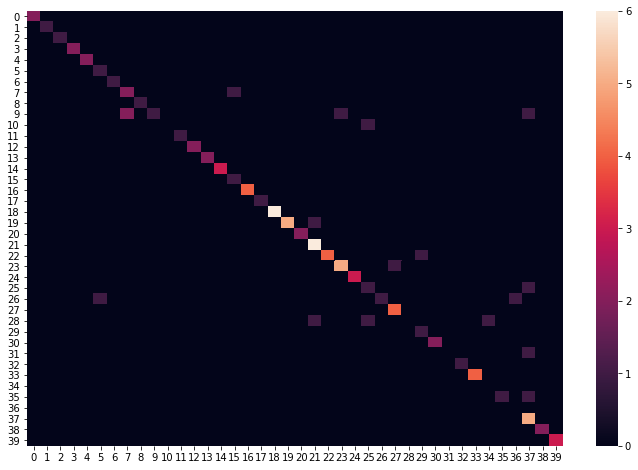

In [ ]:
import seaborn as sns
plt.figure(1, figsize=(12,8))
sns.heatmap(metrics.confusion_matrix(y_test, y_pred))
  
#print(classification_report(y_test,y_pred)) 

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix  

print('Accuracy of SVM classifier on test set: {:.5f}'.format(clf.score(X_test_pca, y_test)))
from sklearn.metrics import classification_report, confusion_matrix  
print(confusion_matrix(y_test,y_pred))

Accuracy of SVM classifier on test set: 0.83168
[[2 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 ...
 [0 0 0 ... 5 0 0]
 [0 0 0 ... 0 2 0]
 [0 0 0 ... 0 0 3]]


In [ ]:
print(y_test.shape, y_pred.shape)

(101,) (101,)


In [ ]:
n_classes = 50

In [ ]:
# Quantitative evaluation of the model quality on the test set
n_classes = 50
print("Predicting people's names on the test set")
#t0 = time()
y_pred = clf.predict(X_test_pca)
#print("done in %0.3fs" % (time() - t0))

print(classification_report(y_test, y_pred, target_names=CATEGORIES))
print(confusion_matrix(y_test, y_pred, labels=range(n_classes)))


Predicting people's names on the test set


ValueError: Number of classes, 44, does not match size of target_names, 50. Try specifying the labels parameter

In [ ]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         1
           2       1.00      1.00      1.00         1
           3       1.00      1.00      1.00         1
           4       1.00      1.00      1.00         1
           5       1.00      1.00      1.00         1
           6       1.00      1.00      1.00         2
           7       1.00      1.00      1.00         1
           8       1.00      1.00      1.00         1
           9       1.00      1.00      1.00         1
          10       1.00      1.00      1.00         1
          11       1.00      1.00      1.00         1
          12       1.00      1.00      1.00         1
          13       0.00      0.00      0.00         1
          14       1.00      1.00      1.00         1
          15       1.00      1.00      1.00         1
          16       1.00      1.00      1.00         1
          17       1.00    

C:\Users\Vaishali\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Vaishali\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Vaishali\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


https://scikit-learn.org/stable/auto_examples/applications/plot_face_recognition.html#sphx-glr-auto-examples-applications-plot-face-recognition-py

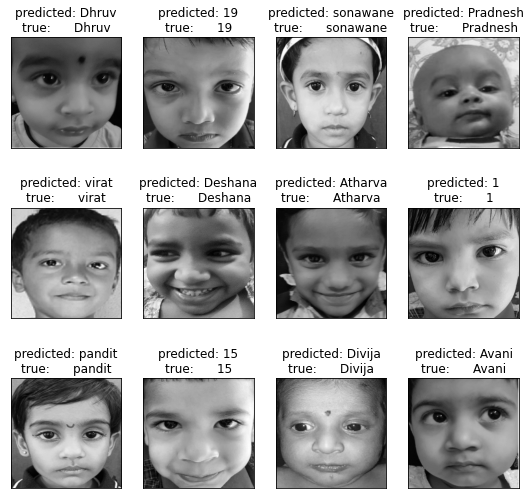

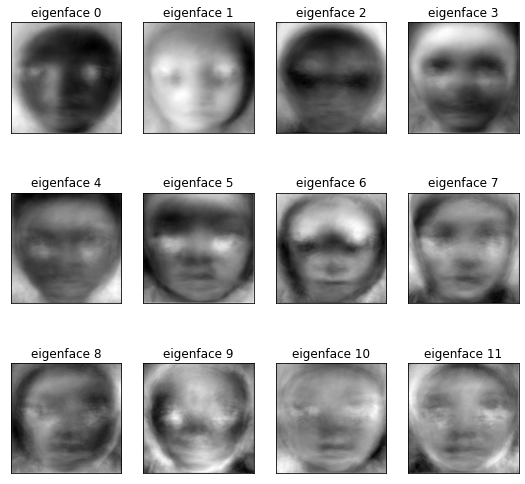

In [ ]:
# introspect the images arrays to find the shapes (for plotting)
#n_samples, h, w = lfw_people.images.shape
n_samples, h, w = X_train.shape
# Qualitative evaluation of the predictions using matplotlib

def plot_gallery(images, titles, h, w, n_row=3, n_col=4):
    """Helper function to plot a gallery of portraits"""
    plt.figure(figsize=(1.8 * n_col, 2.4 * n_row))
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[i].reshape((h, w)), cmap=plt.cm.gray)
        plt.title(titles[i], size=12)
        plt.xticks(())
        plt.yticks(())


# plot the result of the prediction on a portion of the test set

def title(y_pred, y_test, CATEGORIES, i):
    pred_name = CATEGORIES[y_pred[i]].rsplit(' ', 1)[-1]
    true_name = CATEGORIES[y_test[i]].rsplit(' ', 1)[-1]
    return 'predicted: %s\ntrue:      %s' % (pred_name, true_name)

prediction_titles = [title(y_pred, y_test, CATEGORIES, i)
                     for i in range(y_pred.shape[0])]

plot_gallery(X_test, prediction_titles, h, w)

# plot the gallery of the most significative eigenfaces

eigenface_titles = ["eigenface %d" % i for i in range(eigen_faces.shape[0])]
plot_gallery(eigen_faces, eigenface_titles, h, w)

plt.show()

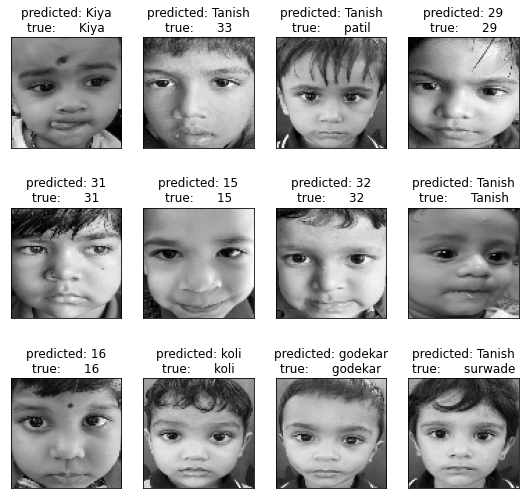

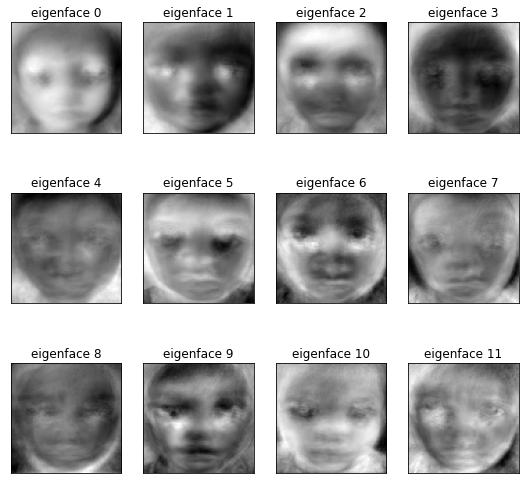

In [ ]:
# Qualitative evaluation of the predictions using matplotlib

def plot_gallery(images, titles, h, w, n_row=3, n_col=4):
    """Helper function to plot a gallery of portraits"""
    plt.figure(figsize=(1.8 * n_col, 2.4 * n_row))
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[i].reshape((h, w)), cmap=plt.cm.gray)
        plt.title(titles[i], size=12)
        plt.xticks(())
        plt.yticks(())


# plot the result of the prediction on a portion of the test set

def title(y_pred, y_test, CATEGORIES, i):
    pred_name = CATEGORIES[y_pred[i]].rsplit(' ', 1)[-1]
    true_name = CATEGORIES[y_test[i]].rsplit(' ', 1)[-1]
    return 'predicted: %s\ntrue:      %s' % (pred_name, true_name)

prediction_titles = [title(y_pred, y_test, CATEGORIES, i)
                     for i in range(y_pred.shape[0])]

plot_gallery(X_test, prediction_titles, h, w)

# plot the gallery of the most significative eigenfaces

eigenface_titles = ["eigenface %d" % i for i in range(eigen_faces.shape[0])]
plot_gallery(eigen_faces, eigenface_titles, h, w)


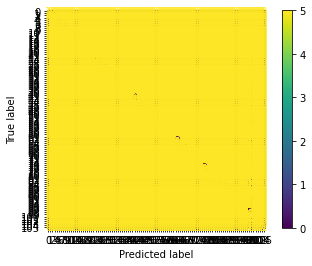

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

y_pred = clf.predict(X_test_pca)
cm = confusion_matrix(y_test, y_pred)

cm_display = ConfusionMatrixDisplay(cm).plot()

https://scikit-learn.org/stable/auto_examples/miscellaneous/plot_display_object_visualization.html#sphx-glr-auto-examples-miscellaneous-plot-display-object-visualization-py
# Create RocCurveDisplay
The roc curve requires either the probabilities or the non-thresholded decision values from the estimator. Since the logistic regression provides a decision function, we will use it to plot the roc curve:

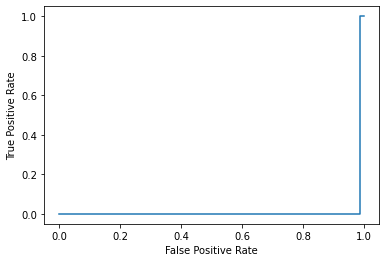

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import RocCurveDisplay
y_score = clf.decision_function(X_test_pca)

fpr, tpr, _ = roc_curve(y_test, y_pred, pos_label=clf.classes_[1])
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()

# Create PrecisionRecallDisplay
Similarly, the precision recall curve can be plotted using y_score from the prevision sections.

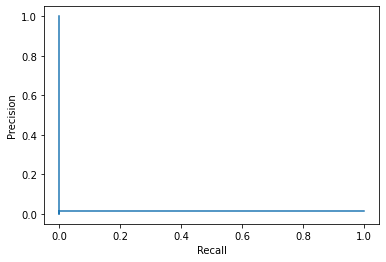

In [ ]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import PrecisionRecallDisplay

prec, recall, _ = precision_recall_curve(y_test, y_pred,
                                         pos_label=clf.classes_[1])
pr_display = PrecisionRecallDisplay(precision=prec, recall=recall).plot()

# Combining the display objects into a single plot
The display objects store the computed values that were passed as arguments. This allows for the visualizations to be easliy combined using matplotlib’s API. In the following example, we place the displays next to each other in a row.

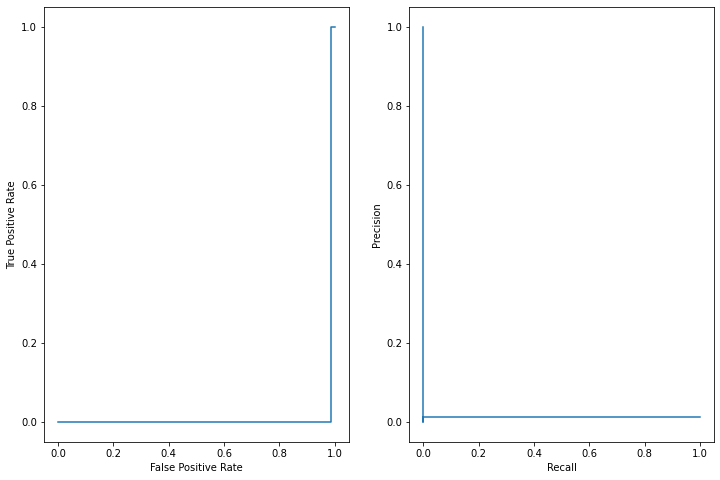

In [ ]:
import matplotlib.pyplot as plt
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 8))

roc_display.plot(ax=ax1)
pr_display.plot(ax=ax2)
plt.show()

In [ ]:
https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

SyntaxError: invalid syntax (<ipython-input-56-ff957105de70>, line 1)

Confusion matrix, without normalization
[[2 0 0 ... 0 0 0]
 [0 2 0 ... 0 0 0]
 [0 0 2 ... 0 0 0]
 ...
 [0 0 0 ... 2 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 3]]
Normalized confusion matrix
[[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]]


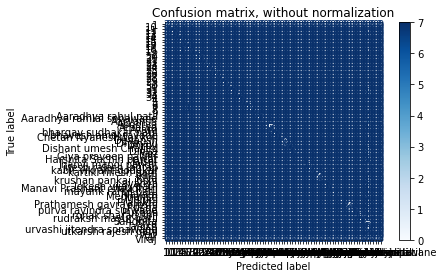

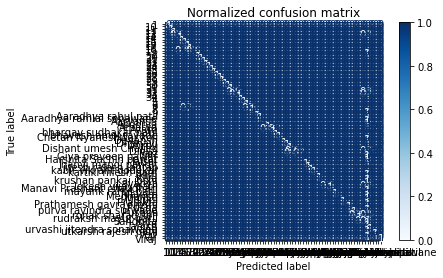

In [ ]:

"""Note Click here to download the full example code or to run this example in your browser via Binder
Confusion matrix
Example of confusion matrix usage to evaluate the quality of the output of a classifier on the iris data set. The diagonal elements represent the number of points for which the predicted label is equal to the true label, while off-diagonal elements are those that are mislabeled by the classifier. The higher the diagonal values of the confusion matrix the better, indicating many correct predictions.

The figures show the confusion matrix with and without normalization by class support size (number of elements in each class). This kind of normalization can be interesting in case of class imbalance to have a more visual interpretation of which class is being misclassified.

Here the results are not as good as they could be as our choice for the regularization parameter C was not the best. In real life applications this parameter is usually chosen using Tuning the hyper-parameters of an estimator.

Confusion matrix, without normalization Normalized confusion matrix
Out:

Confusion matrix, without normalization
[[13  0  0]
 [ 0 10  6]
 [ 0  0  9]]
Normalized confusion matrix
[[1.   0.   0.  ]
 [0.   0.62 0.38]
 [0.   0.   1.  ]]

print(__doc__)"""

import numpy as np
import matplotlib.pyplot as plt

from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix

# import some data to play with
"""iris = datasets.load_iris()
X = iris.data
y = iris.target
class_names = iris.target_names

# Split the data into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# Run classifier, using a model that is too regularized (C too low) to see
# the impact on the results
classifier = svm.SVC(kernel='linear', C=0.01).fit(X_train, y_train)"""

np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(clf, X_test_pca, y_test,
                                 display_labels=CATEGORIES,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()


In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [ ]:
models=[]
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(("LR",LogisticRegression()))
models.append(("NB",GaussianNB()))
models.append(("KNN",KNeighborsClassifier(n_neighbors=5)))
models.append(("DT",DecisionTreeClassifier()))
models.append(("SVM",SVC()))
models.append(("RandomForest",RandomForestClassifier()))

for name, model in models:
    
    clf=model

    clf.fit(X, y_train)

    y_pred=clf.predict(X_test)
    print(10*"=","{} Result".format(name).upper(),10*"=")
    print("Accuracy score:{:0.2f}".format(metrics.accuracy_score(y_test, y_pred)))
    print()

========== LDA RESULT ==========
Accuracy score:0.54



C:\Users\Vaishali\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


========== LR RESULT ==========
Accuracy score:0.85

========== NB RESULT ==========
Accuracy score:0.42

========== KNN RESULT ==========
Accuracy score:0.80

========== DT RESULT ==========
Accuracy score:0.40

========== SVM RESULT ==========
Accuracy score:0.83

========== RANDOMFOREST RESULT ==========
Accuracy score:0.80



In [ ]:
models=[]
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(("LR",LogisticRegression()))
models.append(("NB",GaussianNB()))
models.append(("KNN",KNeighborsClassifier(n_neighbors=5)))
models.append(("DT",DecisionTreeClassifier()))
models.append(("SVM",SVC()))
models.append(("RandomForest",RandomForestClassifier()))

for name, model in models:
    
    clf=model

    clf.fit(X_train_pca, y_train)

    y_pred=clf.predict(X_test_pca)
    print(10*"=","{} Result".format(name).upper(),10*"=")
    print("Accuracy score:{:0.2f}".format(metrics.accuracy_score(y_test, y_pred)))
    print()

========== LDA RESULT ==========
Accuracy score:0.86

========== LR RESULT ==========
Accuracy score:0.82

========== NB RESULT ==========
Accuracy score:0.68

========== KNN RESULT ==========
Accuracy score:0.49

========== DT RESULT ==========
Accuracy score:0.49

========== SVM RESULT ==========
Accuracy score:0.65

========== RANDOMFOREST RESULT ==========
Accuracy score:0.80



NameError: name 'recall' is not defined

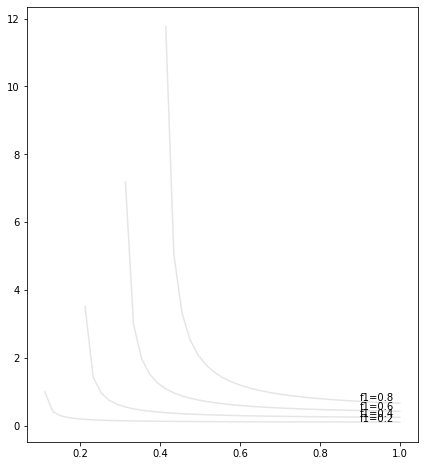

In [ ]:
from itertools import cycle
# setup plot details
#colors = cycle(['navy', 'turquoise', 'darkorange', 'cornflowerblue', 'teal'])
colors = cycle(["CSS Colors"])

plt.figure(figsize=(7, 8))
f_scores = np.linspace(0.2, 0.8, num=4)
lines = []
labels = []
for f_score in f_scores:
    x = np.linspace(0.01, 1)
    y = f_score * x / (2 * x - f_score)
    l, = plt.plot(x[y >= 0], y[y >= 0], color='gray', alpha=0.2)
    plt.annotate('f1={0:0.1f}'.format(f_score), xy=(0.9, y[45] + 0.02))

lines.append(l)
labels.append('iso-f1 curves')
l, = plt.plot(recall["micro"], precision["micro"], color='gold', lw=2)
lines.append(l)
labels.append('micro-average Precision-recall (area = {0:0.2f})'
              ''.format(average_precision["micro"]))

for i, color in zip(range(n_classes), colors):
    l, = plt.plot(recall[i], precision[i], color=color, lw=2)
    lines.append(l)
    labels.append('Precision-recall for class {0} (area = {1:0.2f})'
                  ''.format(i, average_precision[i]))

fig = plt.gcf()
fig.subplots_adjust(bottom=0.25)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Extension of Precision-Recall curve to multi-class')
plt.legend(lines, labels, loc=(0, -.38), prop=dict(size=14))


plt.show()

In [ ]:
print(X.shape)

(357, 6400)


In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
pca=PCA(n_components=n_components, whiten=True)
pca.fit(X)
X_pca=pca.transform(X)
for name, model in models:
    kfold=KFold(n_splits=5, shuffle=True, random_state=0)
    
    cv_scores=cross_val_score(model, X_pca, y_train, cv=kfold)
    print("{} mean cross validations score:{:.2f}".format(name, cv_scores.mean()))

LDA mean cross validations score:0.86
LR mean cross validations score:0.79
NB mean cross validations score:0.27
KNN mean cross validations score:0.47
DT mean cross validations score:0.38
SVM mean cross validations score:0.51
RandomForest mean cross validations score:0.69


In [ ]:
lr=LinearDiscriminantAnalysis()
lr.fit(X_train_pca, y_train)
y_pred=lr.predict(X_test_pca)
print("Accuracy score:{:.2f}".format(metrics.accuracy_score(y_test, y_pred)))

Accuracy score:0.92


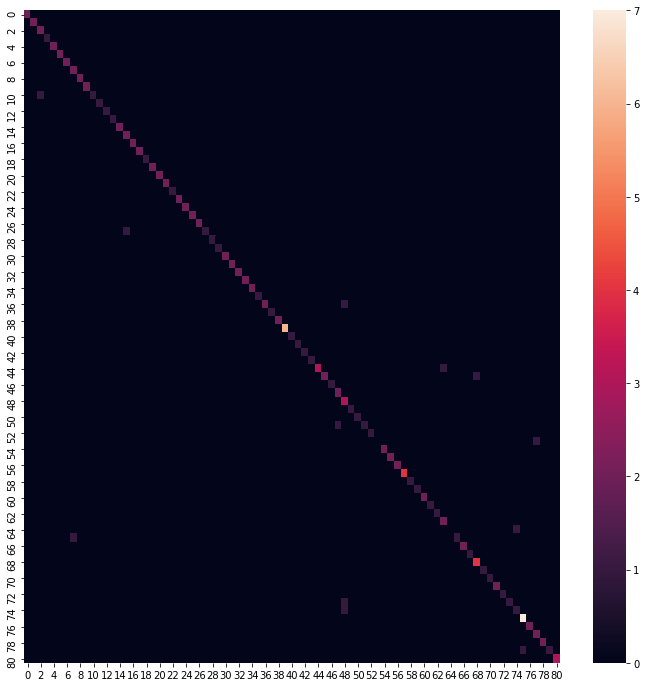

In [ ]:
cm=metrics.confusion_matrix(y_test, y_pred)

plt.subplots(1, figsize=(12,12))
sns.heatmap(cm)

In [ ]:
print("Classification Results:\n{}".format(metrics.classification_report(y_test, y_pred)))

Classification Results:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         2
           2       1.00      1.00      1.00         2
           3       1.00      1.00      1.00         1
           4       0.67      1.00      0.80         2
           5       1.00      1.00      1.00         2
           6       1.00      1.00      1.00         2
           7       1.00      1.00      1.00         2
           8       1.00      1.00      1.00         2
           9       1.00      1.00      1.00         2
          10       1.00      1.00      1.00         2
          11       1.00      1.00      1.00         1
          12       1.00      1.00      1.00         1
          13       1.00      1.00      1.00         1
          14       1.00      1.00      1.00         2
          15       1.00      1.00      1.00         2
          16       1.00      1.00      1.00         2
   

C:\Users\Vaishali\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn.model_selection import LeaveOneOut
loo_cv=LeaveOneOut()
clf=LogisticRegression()
cv_scores=cross_val_score(clf,
                         X_train_pca,
                         y_train,
                         cv=loo_cv)
print("{} Leave One Out cross-validation mean accuracy score:{:.2f}".format(clf.__class__.__name__, 
                                                                            cv_scores.mean()))

LogisticRegression Leave One Out cross-validation mean accuracy score:0.84


In [ ]:
from sklearn.model_selection import LeaveOneOut
loo_cv=LeaveOneOut()
clf=LinearDiscriminantAnalysis()
cv_scores=cross_val_score(clf,
                         X_train_pca,
                         y_train,
                         cv=loo_cv)
print("{} Leave One Out cross-validation mean accuracy score:{:.2f}".format(clf.__class__.__name__, 
                                                                            cv_scores.mean()))

LinearDiscriminantAnalysis Leave One Out cross-validation mean accuracy score:0.89


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import LeaveOneOut

#This process takes long time. You can use parameter:{'C': 1.0, 'penalty': 'l2'} 
#grid search cross validation score:0.93

params={'penalty':[ 'l2'],
                'C':np.logspace(0, 4, 10)
                }
clf=LogisticRegression()
#kfold=KFold(n_splits=3, shuffle=True, random_state=0)
loo_cv=LeaveOneOut()
gridSearchCV=GridSearchCV(clf, params, cv=loo_cv)
gridSearchCV.fit(X_train_pca, y_train)
print("Grid search fitted..")
print(gridSearchCV.best_params_)
print(gridSearchCV.best_score_)
print("grid search cross validation score:{:.2f}".format(gridSearchCV.score(X_test_pca, y_test)))


In [ ]:
lr=LogisticRegression(C=1.0, penalty="l2")
lr.fit(X_train_pca, y_train)
print("lr score:{:.2f}".format(lr.score(X_test_pca, y_test)))

lr score:0.91


In [ ]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.preprocessing import label_binarize

Target=label_binarize(y_train, classes=range(48))
print(Target.shape)
print(Target[0])

n_classes=Target.shape[1]

(357, 48)
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0]


In [ ]:
X_train_multiclass, X_test_multiclass, y_train_multiclass, y_test_multiclass=train_test_split(X_train_pca, 
                                                                                              Target,
                                                                                             test_size=0.3,
                                                                                             stratify=Target,
                                                                                     random_state=0)

In [ ]:
pca=PCA(n_components=n_components, whiten=True)
pca.fit(X_train_multiclass)

X_train_multiclass_pca=pca.transform(X_train_multiclass)
X_test_multiclass_pca=pca.transform(X_test_multiclass)


In [ ]:
oneRestClassifier=OneVsRestClassifier(lr)

oneRestClassifier.fit(X_train_multiclass_pca, y_train_multiclass)
y_score=oneRestClassifier.decision_function(X_test_multiclass_pca)

In [ ]:
# For each class
precision = dict()
recall = dict()
average_precision = dict()
for i in range(n_classes):
    precision[i], recall[i], _ = metrics.precision_recall_curve(y_test_multiclass[:, i],
                                                        y_score[:, i])
    average_precision[i] = metrics.average_precision_score(y_test_multiclass[:, i], y_score[:, i])

# A "micro-average": quantifying score on all classes jointly
precision["micro"], recall["micro"], _ = metrics.precision_recall_curve(y_test_multiclass.ravel(),
    y_score.ravel())
average_precision["micro"] = metrics.average_precision_score(y_test_multiclass, y_score,
                                                     average="micro")
print('Average precision score, micro-averaged over all classes: {0:0.2f}'
      .format(average_precision["micro"]))

Average precision score, micro-averaged over all classes: 0.73


Text(0.5, 1.0, 'Average precision score, micro-averaged over all classes: AP=0.73')

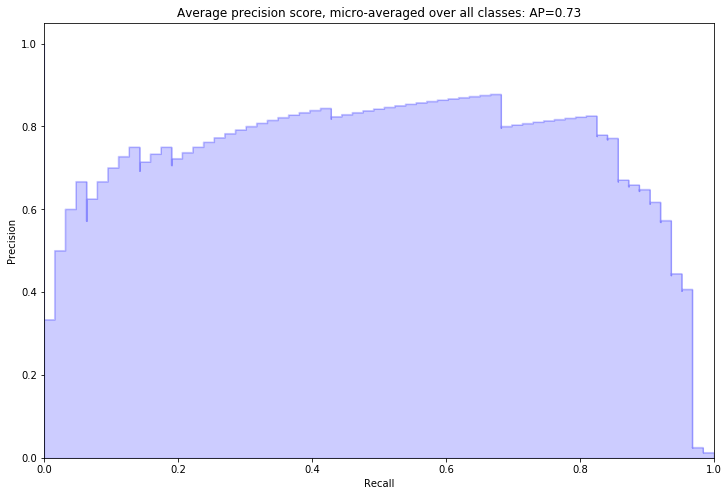

In [ ]:
#from sklearn.utils.fixes import signature
try:
    from inspect import signature
except ImportError:
    from ..externals.funcsigs import signature
from funcsigs import signature

step_kwargs = ({'step': 'post'}
               if 'step' in signature(plt.fill_between).parameters
               else {})
plt.figure(1, figsize=(12,8))
plt.step(recall['micro'], precision['micro'], color='b', alpha=0.2,
         where='post')
plt.fill_between(recall["micro"], precision["micro"], alpha=0.2, color='b',
                 **step_kwargs)

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title(
    'Average precision score, micro-averaged over all classes: AP={0:0.2f}'
    .format(average_precision["micro"]))

In [ ]:
try:
    from inspect import signature
except ImportError:
    from ..externals.funcsigs import signature

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis(n_components=n_components)
X_train_lda = lda.fit(X, y_train).transform(X)
X_test_lda=lda.transform(X_test)

ValueError: Found array with dim 3. LinearDiscriminantAnalysis expected <= 2.

In [ ]:
lr=LogisticRegression(C=1.0, penalty="l2")
lr.fit(X_train_lda,y_train)
y_pred=lr.predict(X_test_lda)

C:\Users\Vaishali\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [ ]:
print("Accuracy score:{:.2f}".format(metrics.accuracy_score(y_test, y_pred)))
print("Classification Results:\n{}".format(metrics.classification_report(y_test, y_pred)))

Accuracy score:0.94
Classification Results:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         2
           2       1.00      1.00      1.00         2
           3       1.00      1.00      1.00         1
           4       1.00      1.00      1.00         2
           5       1.00      1.00      1.00         2
           6       0.67      1.00      0.80         2
           7       0.67      1.00      0.80         2
           8       1.00      1.00      1.00         2
           9       1.00      1.00      1.00         2
          10       1.00      0.50      0.67         2
          11       1.00      1.00      1.00         1
          12       1.00      1.00      1.00         1
          13       1.00      1.00      1.00         1
          14       1.00      1.00      1.00         2
          15       1.00      1.00      1.00         2
          16       1.00      1.00    

C:\Users\Vaishali\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn.pipeline import Pipeline
work_flows_std = list()
work_flows_std.append(('lda', LinearDiscriminantAnalysis(n_components=n_components)))
work_flows_std.append(('logReg', LogisticRegression(C=1.0, penalty="l2")))
model_std = Pipeline(work_flows_std)
model_std.fit(X, y_train)
y_pred=model_std.predict(X_test)

C:\Users\Vaishali\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:463: ChangedBehaviorWarning: n_components cannot be larger than min(n_features, n_classes - 1). Using min(n_features, n_classes - 1) = min(6400, 81 - 1) = 80 components.
  ChangedBehaviorWarning)
C:\Users\Vaishali\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:469: FutureWarning: In version 0.23, setting n_components > min(n_features, n_classes - 1) will raise a ValueError. You should set n_components to None (default), or a value smaller or equal to min(n_features, n_classes - 1).
  warnings.warn(future_msg, FutureWarning)
C:\Users\Vaishali\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alterna

In [ ]:
print("Accuracy score:{:.2f}".format(metrics.accuracy_score(y_test, y_pred)))
print("Classification Results:\n{}".format(metrics.classification_report(y_test, y_pred)))

Accuracy score:0.94
Classification Results:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         2
           2       1.00      1.00      1.00         2
           3       1.00      1.00      1.00         1
           4       1.00      1.00      1.00         2
           5       1.00      1.00      1.00         2
           6       0.67      1.00      0.80         2
           7       0.67      1.00      0.80         2
           8       1.00      1.00      1.00         2
           9       1.00      1.00      1.00         2
          10       1.00      0.50      0.67         2
          11       1.00      1.00      1.00         1
          12       1.00      1.00      1.00         1
          13       1.00      1.00      1.00         1
          14       1.00      1.00      1.00         2
          15       1.00      1.00      1.00         2
          16       1.00      1.00    

C:\Users\Vaishali\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
